In [33]:
import os
import pandas as pd
import sklearn.metrics as m
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [7]:
test = []

test_neg_path = os.path.join('aclImdb', 'test', 'neg')
fnames = os.listdir(test_neg_path)
for file in fnames:
    with open(test_neg_path + os.path.sep + file) as f:   
        test.append({"text" : f.read(), 'key' : 0})

test_pos_path = os.path.join('aclImdb', 'test', 'pos')
fnames = os.listdir(test_pos_path)
for file in fnames:
    with open(test_pos_path + os.path.sep + file) as f:   
        test.append({"text" : f.read(), 'key' : 1})

test = pd.DataFrame.from_records(test)

In [8]:
train = []

train_neg_path = os.path.join('aclImdb', 'train', 'neg')
fnames = os.listdir(train_neg_path)
for file in fnames:
    with open(train_neg_path + os.path.sep + file) as f:   
        train.append({"text" : f.read(), 'key' : 0})

train_pos_path = os.path.join('aclImdb', 'train', 'pos')
fnames = os.listdir(train_pos_path)
for file in fnames:
    with open(train_pos_path + os.path.sep + file) as f:   
        train.append({"text" : f.read(), 'key' : 1})

train = pd.DataFrame.from_records(train)

In [18]:
cv = CountVectorizer(50)
cv_train = cv.fit_transform(train.text)
cv_test = cv.transform(test.text)

In [23]:
def print_metrics(prediction):
    acc = m.accuracy_score(test.key, prediction)
    f1 = m.f1_score(test.key, prediction)
    precision = m.precision_score(test.key, prediction)
    recall = m.recall_score(test.key, prediction)
    roc_auc = m.roc_auc_score(test.key, prediction)
    print(
        'F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}, ' \
        'ROC-AUC = {3:1.4f}'.format(
            f1, precision, recall, roc_auc)
    )

In [39]:
def draw(prediction):
    fpr, tpr, _ = m.roc_curve(test.key, prediction)
    pyplot.plot(fpr, tpr, marker='.', label='Test')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    pyplot.clf()

`KNeighborsClassifier`

In [20]:
model1 = KNeighborsClassifier().fit(cv_train, train.key)

In [24]:
prediction1 = model1.predict(cv_test)

In [25]:
print_metrics(prediction1)

F1=0.6481, Precision=0.6080, Recall=0.6939, ROC-AUC = 0.6233


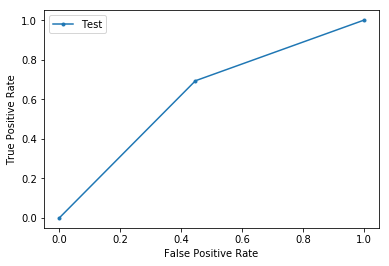

<Figure size 432x288 with 0 Axes>

In [40]:
draw(prediction1)

`LogisticRegression`

In [26]:
model2 = LogisticRegression().fit(cv_train, train.key)

/home/misha/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
prediction2 = model2.predict(cv_test)

In [28]:
print_metrics(prediction2)

F1=0.8657, Precision=0.8726, Recall=0.8588, ROC-AUC = 0.8667


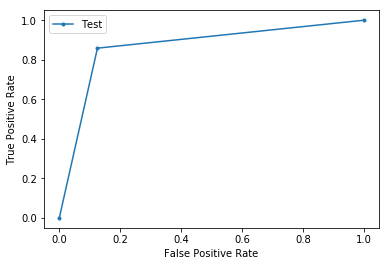

<Figure size 432x288 with 0 Axes>

In [41]:
draw(prediction2)

`MultinomialNB`

In [30]:
model3 = MultinomialNB().fit(cv_train, train.key)

In [31]:
prediction3 = model3.predict(cv_test)

In [32]:
print_metrics(prediction3)

F1=0.8006, Precision=0.8605, Recall=0.7484, ROC-AUC = 0.8136


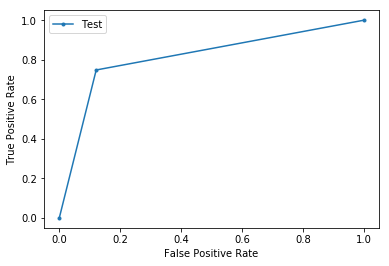

<Figure size 432x288 with 0 Axes>

In [42]:
draw(prediction3)

Функции метрик

In [54]:
tp = lambda result, expected: len([
    _ for i in range(len(result))
    if result[i] == 1 and expected[i] == 1
])

fp = lambda result, expected: len([
    _ for i in range(len(result))
    if result[i] == 1 and expected[i] == 0
])

tn = lambda result, expected: len([
    _ for i in range(len(result))
    if result[i] == 0 and expected[i] == 0
])

fn = lambda result, expected: len([
    _ for i in range(len(result))
    if result[i] == 0 and expected[i] == 1
])

def precision_score(result, expected):
    p = tp(result, expected) / (tp(result, expected) + fp(result, expected))
    return p

def recall_score(result, expected):
    r = tp(result, expected) / (tp(result, expected) + fn(result, expected))
    return r

def f1_score(result, expected):
    p = precision_score(result, expected)
    r = recall_score(result, expected)
    f1 = (2 * p * r) / (p + r)
    return f1

def print_my_metrics(prediction):
    f1 = f1_score(prediction, test.key)
    precision = precision_score(prediction, test.key)
    recall = recall_score(prediction, test.key)
    print(
        'F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}'.format(
            f1, precision, recall)
    )

In [56]:
print_my_metrics(prediction1)
print_my_metrics(prediction2)
print_my_metrics(prediction3)

F1=0.6481, Precision=0.6080, Recall=0.6939
F1=0.8657, Precision=0.8726, Recall=0.8588
F1=0.8006, Precision=0.8605, Recall=0.7484
